/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (378, 374, 3) looks like an RGB image
  warn(msg.format(image.shape))
/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


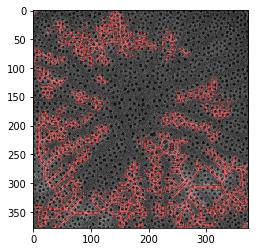

In [27]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild013.tif')
blur = cv2.blur(img,(15,15))
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
from skimage.filters import threshold_otsu
thotsu=threshold_otsu(blur)
otsublur = blur[:,:,0]> thotsu

from skimage.morphology import skeletonize
otsuskeleton = skeletonize(otsublur)
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(otsuskeleton, cmap=red2, interpolation='sinc', alpha=.42) 

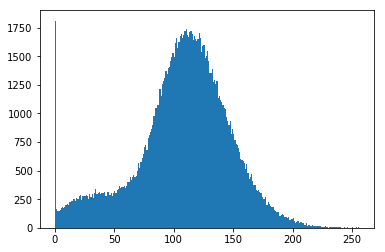

106.63251563251563

In [29]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild013.tif',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

np.mean(img)

In [30]:
np.std(img)

40.475230458975965

In [31]:
from PIL import Image
im = Image.open("cropped_Wild013.tif")

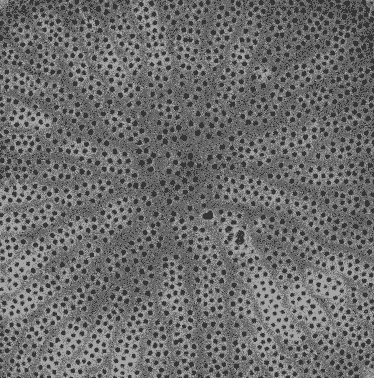

In [111]:
im.quantize(5,0)

In [112]:
image=im.quantize(5,0)
image.save('simple_Wild013.tif')

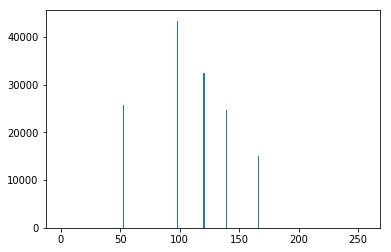

In [113]:
newimg = cv.imread('simple_Wild013.tif',0)
plt.hist(newimg.ravel(),256,[0,256]); plt.show()

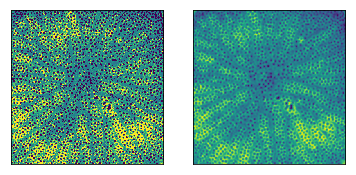

(378, 374)

In [106]:
blur = cv2.blur(newimg,(5, 5))
plt.subplot(121),plt.imshow(newimg)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur)
plt.xticks([]), plt.yticks([])
plt.show()
np.shape(blur)

In [107]:
from skimage.filters import threshold_otsu
th=threshold_otsu(newimg)
print(th)
print(newimg)
np.shape(newimg)

98
[[139 166 166 ... 166 125 125]
 [125 166 139 ...  98 125 125]
 [139 139 139 ...  52  52 125]
 ...
 [ 98  98  98 ... 125 139 139]
 [ 98 125  52 ... 139 166 166]
 [ 52 125  98 ... 166 139 139]]


(378, 374)

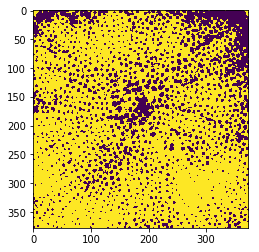

In [120]:
blur_threshold = blur[:,:] > th
plt.imshow(blur_threshold)

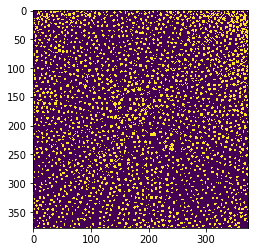

In [109]:
threshold = newimg[:,:] < th
plt.imshow(threshold)

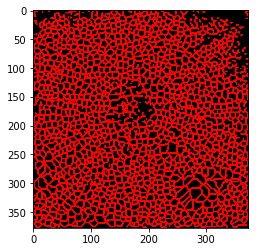

In [110]:
from skimage.morphology import skeletonize
skeleton = skeletonize(blur_threshold)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')